# Case-Study 1 (Decision Tree)

### 1.1 Explain about Data Set Information:( diabetes.csv )


* Source

The original dataset is available at UCI Machine Learning Repository and can be downloaded from this address: http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes


* The problem

The type of dataset and problem is a classic supervised binary classification. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyse the data, do any required transformation and normalisation, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.


This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

### 1.2 Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.3 Load the dataset

In [2]:
df1 = pd.read_csv('diabetes.csv')
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 1.4. Data correlation matrix

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics. Let's calculate the correlation matrix for our dataset.

In [3]:
cor = df1.corr()
print(cor)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

### 1.4 a) EDA For correlation Heatmap?

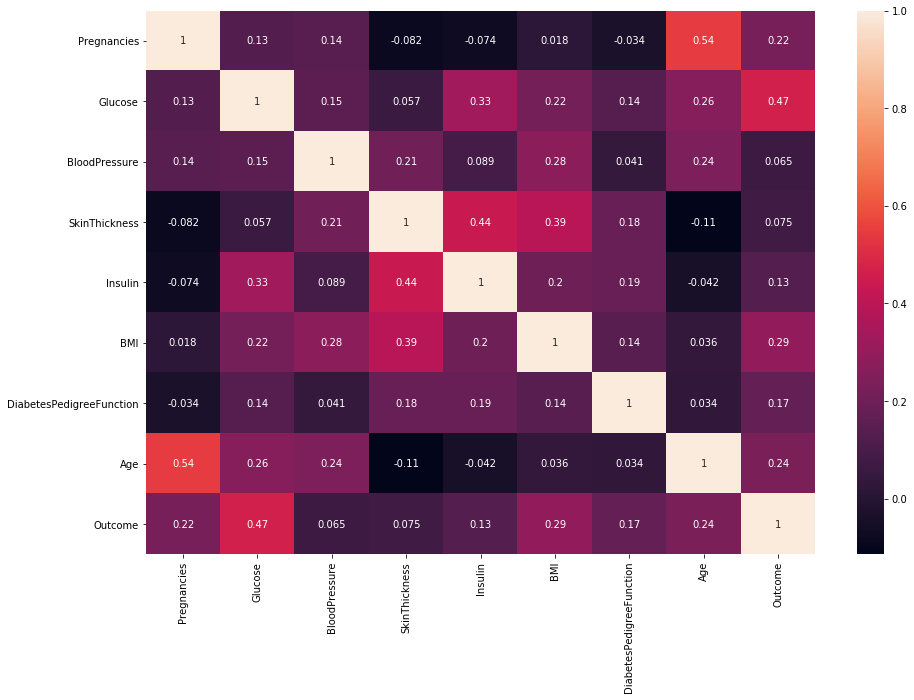

In [4]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(cor, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### 1.5 EDA for dataset use the hist?

In [5]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

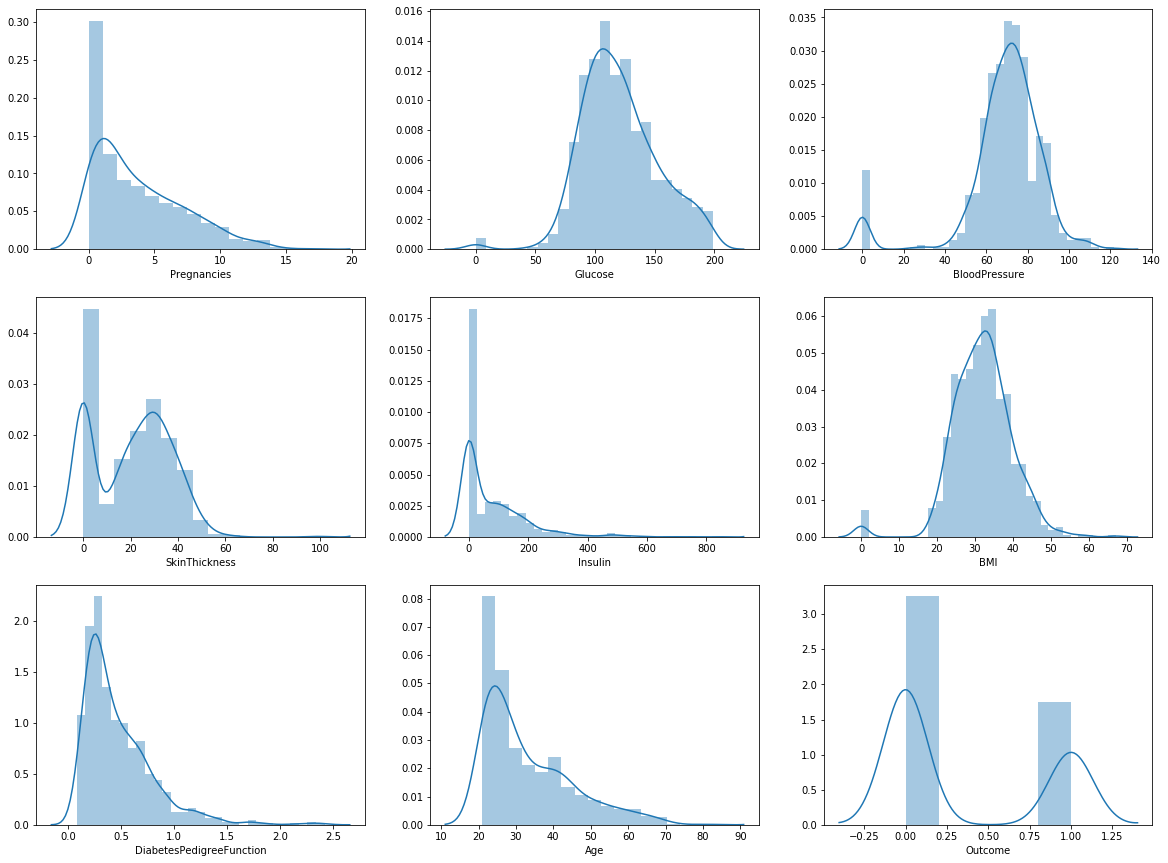

In [6]:
f,ax= plt.subplots(3,3, figsize=(20,15)) ##structuring
sns.distplot(df1['Pregnancies'], ax = ax[0,0])
sns.distplot(df1['Glucose'], ax=ax[0,1])
sns.distplot(df1['BloodPressure'], ax=ax[0,2])
sns.distplot(df1['SkinThickness'], ax=ax[1,0])
sns.distplot(df1['Insulin'], ax=ax[1,1])
sns.distplot(df1['BMI'], ax=ax[1,2])
sns.distplot(df1['DiabetesPedigreeFunction'], ax=ax[2,0])
sns.distplot(df1['Age'], ax=ax[2,1])
sns.distplot(df1['Outcome'], ax=ax[2,2])
plt.show()

### 1.6 Data cleaning and transformation

calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

In [7]:
# Calculate the median value for BMI
print(np.median(df1['BMI']))

# Substitute it in the BMI column of the
# dataset where values are 0

df1['BMI'] = df1['BMI'].replace({0:32})
df1['BMI']

32.0


0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [8]:
# Calculate the median value for BloodPressure

print(np.median(df1['BloodPressure']))

# Substitute it in the BloodPressure column of the
# dataset where values are 0

df1['BloodPressure'] = df1['BloodPressure'].replace({0:72})
df1['BloodPressure']

72.0


0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

In [9]:
# Calculate the median value for Glucose
print(np.median(df1['Glucose']))

# Substitute it in the Glucose column of the
# dataset where values are 0

df1['Glucose'] = df1['Glucose'].replace({0:117})


117.0


In [10]:
# Calculate the median value for SkinThickness

print(np.median(df1['SkinThickness']))
# Substitute it in the SkinThickness column of the
# dataset where values are 0

df1['SkinThickness'] = df1['SkinThickness'].replace({0:23})
df1['SkinThickness']

23.0


0      35
1      29
2      23
3      23
4      35
       ..
763    48
764    27
765    23
766    23
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [11]:
# Calculate the median value for Insulin
print(np.median(df1['Insulin']))


# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
df1['Insulin'] = df1['Insulin'].replace({0:30.5})
df1['Insulin']

30.5


0       30.5
1       30.5
2       30.5
3       94.0
4      168.0
       ...  
763    180.0
764     30.5
765    112.0
766     30.5
767     30.5
Name: Insulin, Length: 768, dtype: float64

 ### 1.7 Extract the independent variable X and dependent variable Y?

In [12]:
X = df1.drop(columns = 'Outcome')
y = df1['Outcome']

### 1.8 Split the data into train and test set:(70/30)

Now that we have transformed the data we need to split the dataset in two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

### 1.9 Preprocessing Data for performing Model?Apply  (StandardScaler)


In [14]:
from scipy.stats import skew, norm, zscore
df1['ZInsulin'] = zscore(df1['Insulin'])
df1['ZInsulin']

0     -0.608201
1     -0.608201
2     -0.608201
3     -0.006185
4      0.695378
         ...   
763    0.809145
764   -0.608201
765    0.164466
766   -0.608201
767   -0.608201
Name: ZInsulin, Length: 768, dtype: float64

### 1.10 Train a Decision Tree 

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


from sklearn.tree import DecisionTreeClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


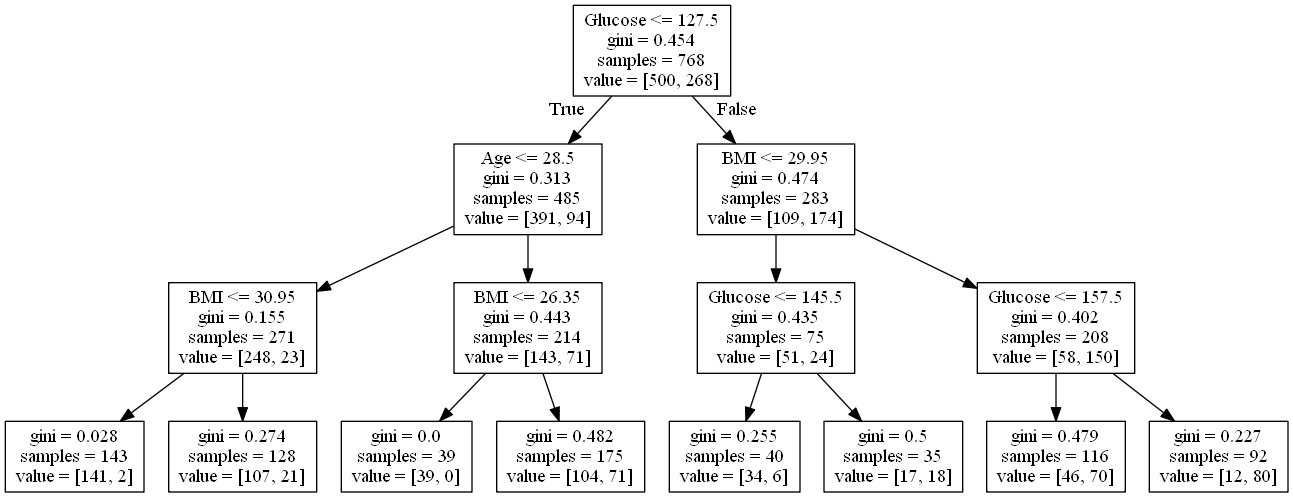

In [16]:
dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=11)
dt.fit(X,y)
features = X.columns
dot_data = export_graphviz(dt,out_file=None,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### 1.11  Predict the model:

In [17]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]
y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

### 1.12 Evaluation the model:

In [18]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_pred_train))

print('Auc of Decision Tree on Test', roc_auc_score(y_test, y_prob))
print('Auc of Decision Tree on Train', roc_auc_score(y_train, y_prob_train))

Accuracy of Decision Tree on Test 0.7922077922077922
Accuracy of Decision Tree on Train 1.0
Auc of Decision Tree on Test 0.8729250604351331
Auc of Decision Tree on Train 0.833981661572659


## Hyperparameters for tuning the model

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

dt = DecisionTreeClassifier(random_state = 1)

params = {'max_depth': sp_randint(2,10), 
        'min_samples_split': sp_randint(2,50),
         'min_samples_leaf': sp_randint(1,20),
         'criterion': ['gini', 'entropy']}

rand_search = RandomizedSearchCV(dt, param_distributions = params, cv = 3, random_state = 1)

rand_search.fit(X,y)

print(rand_search.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 14, 'min_samples_split': 8}


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [22]:
dt = DecisionTreeClassifier(**rand_search.best_params_)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]


from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

print('Accuracy of Decision Tree on Test',accuracy_score(y_pred,y_test))
print('Accuracy of Decision Tree on Train',accuracy_score(y_pred_train,y_train))

print('AUC of Decision Tree on Test', roc_auc_score(y_test, y_prob))
print('AUC of Decision Tree on Train', roc_auc_score(y_train, y_prob_train))

Accuracy of Decision Tree on Test 0.7662337662337663
Accuracy of Decision Tree on Train 0.8175046554934823
AUC of Decision Tree on Test 0.8334004834810635
AUC of Decision Tree on Train 0.902040690315211
